## EXPLORATORY DATA ANALYSIS FOR MACHINE LEARNING

##### Impor the required python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.stats import norm, skew, kurtosis

##### Read the data 

In [2]:
data = pd.read_csv(r"data\Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


##### Know your data

1. Examine Data Shape and Size. (i.e., rows and columns).

2. Inspect Feature Names. (List all columns).

3. Review Data Types and Missing Values. (Using info()).

4. Summarize Key Descriptive Statistics. (Using describe()).

5. Identify and Count Unique Values per Feature.

6. Visualize Feature Distributions i.e, create plots (histograms, box plots, etc.) to visually inspect the distributions of various features.

In [3]:
data.shape

(200, 5)

In [4]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data['Genre'].unique()

array(['Male', 'Female'], dtype=object)

In [8]:
data['Genre'].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

In [9]:
data['Genre'].value_counts(normalize = True)*100

Genre
Female    56.0
Male      44.0
Name: proportion, dtype: float64

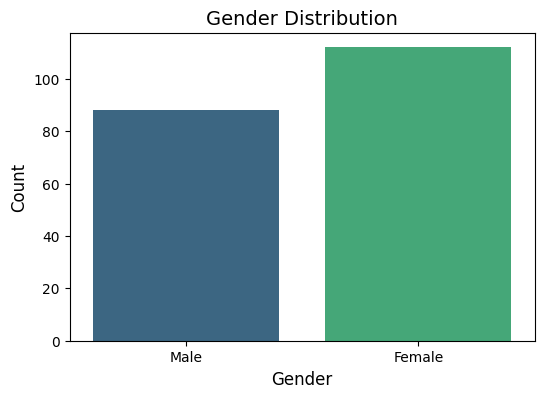

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='Genre', data=data, hue = 'Genre', palette='viridis', legend = False)  # specify column & palette
plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


In [11]:
len(data['Age'].unique())

51

In [12]:
bins_gender = len(data['Age'].unique())
bins_gender

51

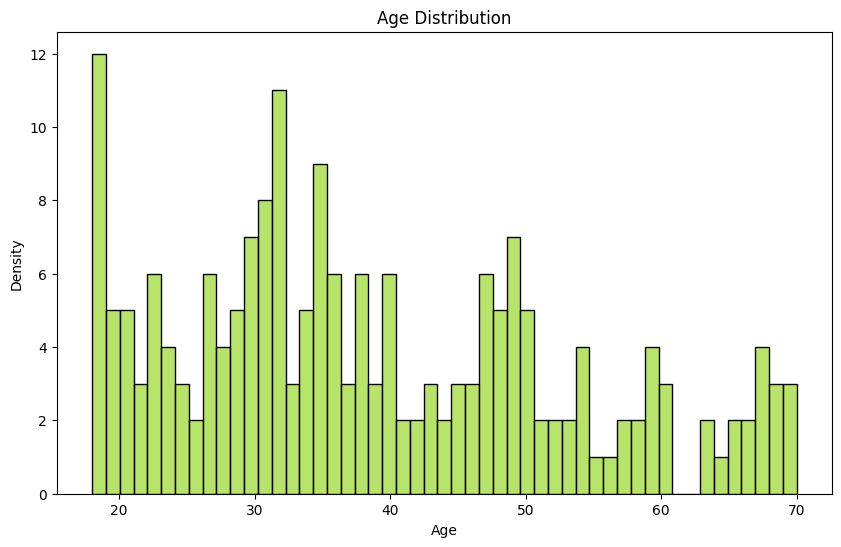

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], bins=bins_gender, color = sns.color_palette('viridis')[5])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [14]:
bins_income = len(data['Annual Income (k$)'].unique())
bins_income

64

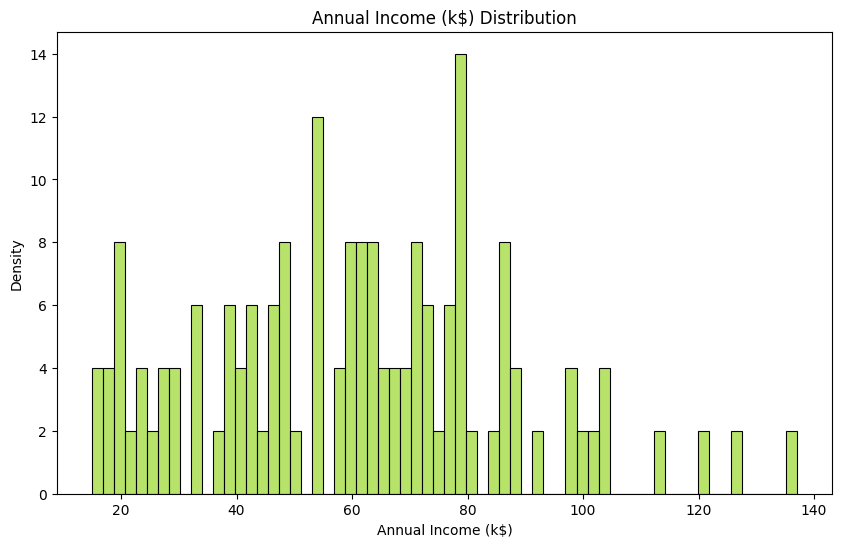

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(data['Annual Income (k$)'], bins=bins_income, color = sns.color_palette('viridis')[5])
plt.title('Annual Income (k$) Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Density')
plt.show()

In [16]:
bins_spending_score = len(data['Spending Score (1-100)'].unique())
bins_spending_score

84

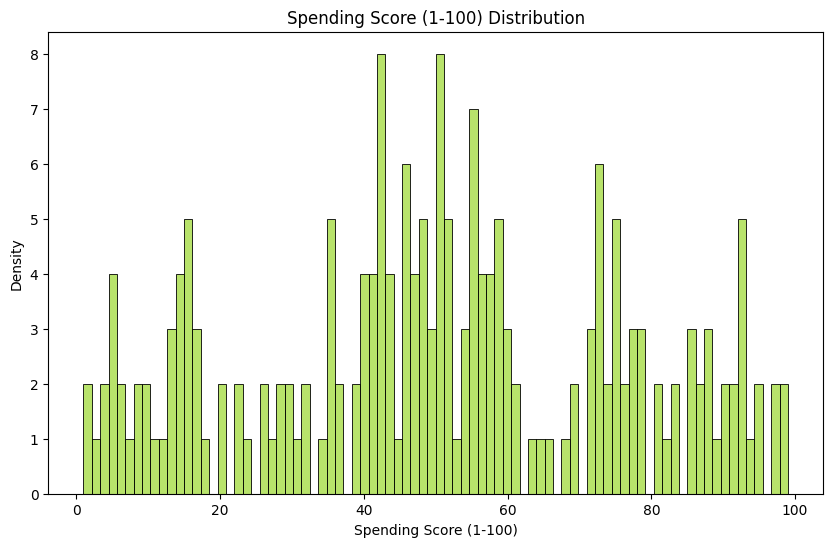

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(data['Spending Score (1-100)'], bins=bins_spending_score, color = sns.color_palette('viridis')[5])
plt.title('Spending Score (1-100) Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Density')
plt.show()

##### FOR GENDER = FEMALE

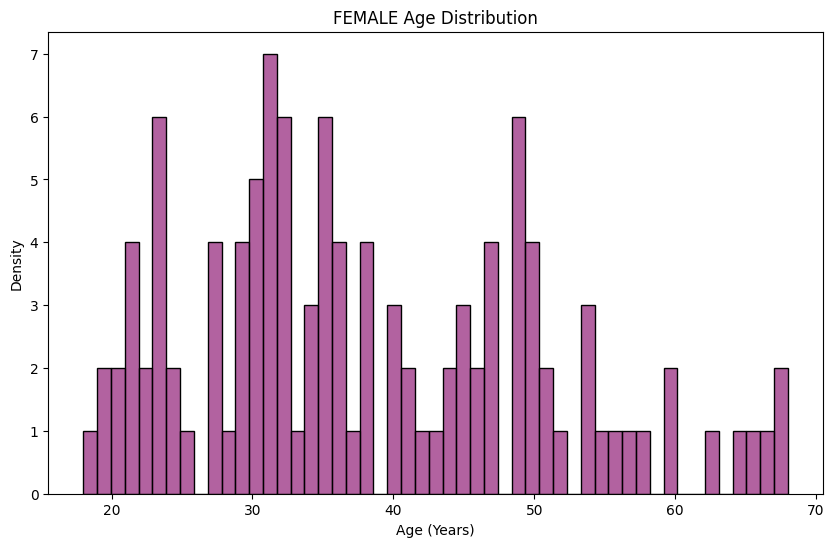

In [18]:
plt.figure(figsize = (10,6))
sns.histplot(data[data['Genre']=='Female']['Age'], bins = bins_gender, color = sns.color_palette('magma')[2])
plt.title('FEMALE Age Distribution')
plt.xlabel('Age (Years)')
plt.ylabel('Density')
plt.show()

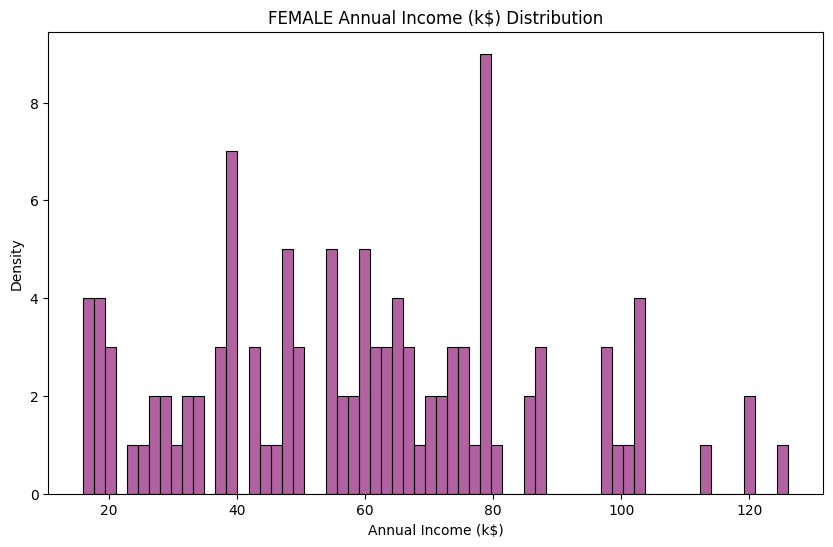

In [19]:
plt.figure(figsize = (10,6))
sns.histplot(data[data['Genre']=='Female']['Annual Income (k$)'], bins = bins_income, color = sns.color_palette('magma')[2])
plt.title('FEMALE Annual Income (k$) Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Density')
plt.show()

In [20]:
bins_spending_score = len(data['Spending Score (1-100)'].unique())
bins_spending_score

84

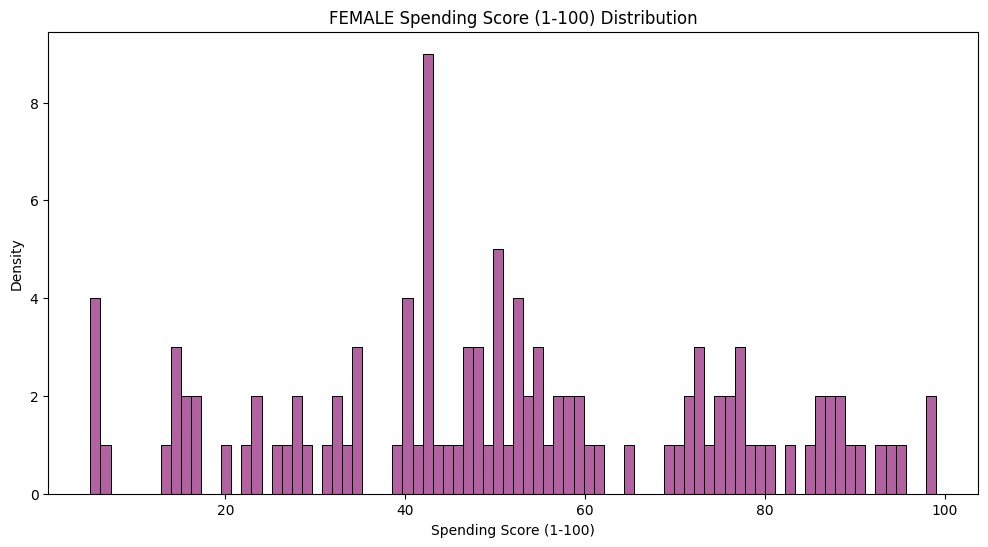

In [21]:
plt.figure(figsize = (12,6))
sns.histplot(data[data['Genre']=='Female']['Spending Score (1-100)'], bins = bins_spending_score, color = sns.color_palette('magma')[2])
plt.title('FEMALE Spending Score (1-100) Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Density')
plt.show()

##### FOR GENDER = MALE

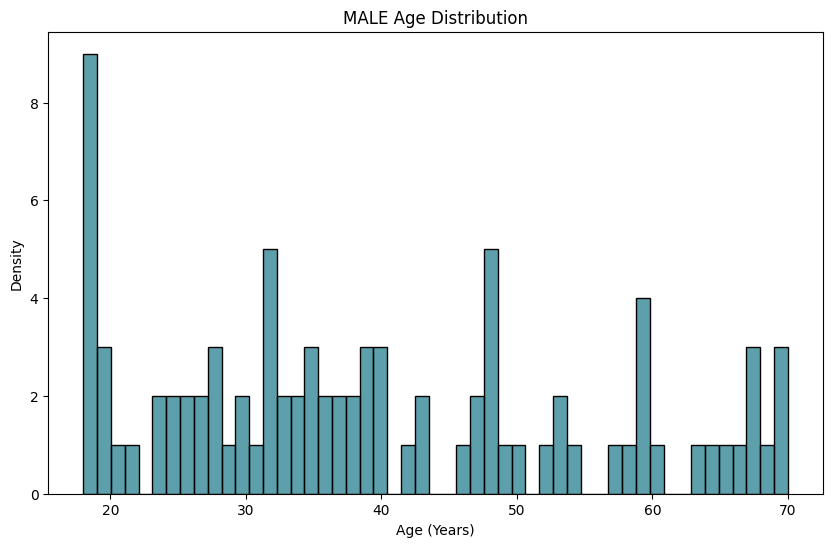

In [22]:
plt.figure(figsize = (10,6))
sns.histplot(data[data['Genre']=='Male']['Age'], bins = bins_gender, color = sns.color_palette('viridis')[2])
plt.title('MALE Age Distribution')
plt.xlabel('Age (Years)')
plt.ylabel('Density')
plt.show()

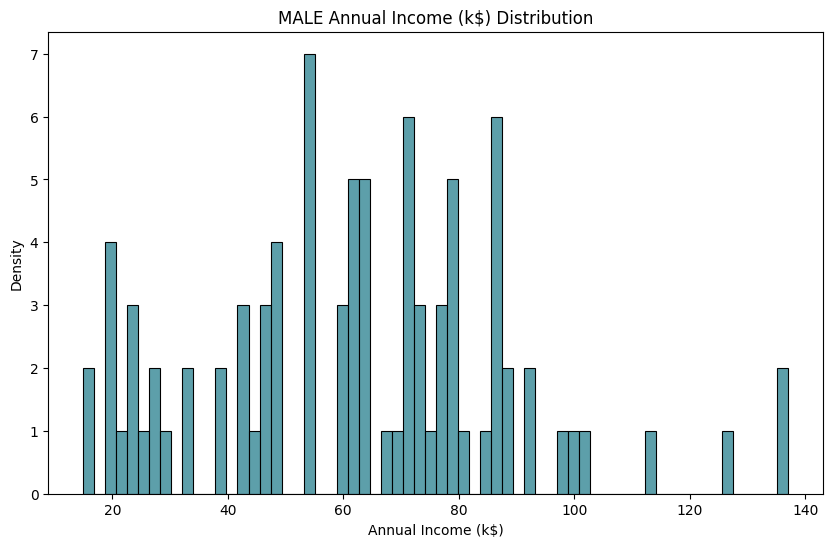

In [23]:
plt.figure(figsize = (10,6))
sns.histplot(data[data['Genre']=='Male']['Annual Income (k$)'], bins = bins_income, color = sns.color_palette('viridis')[2])
plt.title('MALE Annual Income (k$) Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Density')
plt.show()

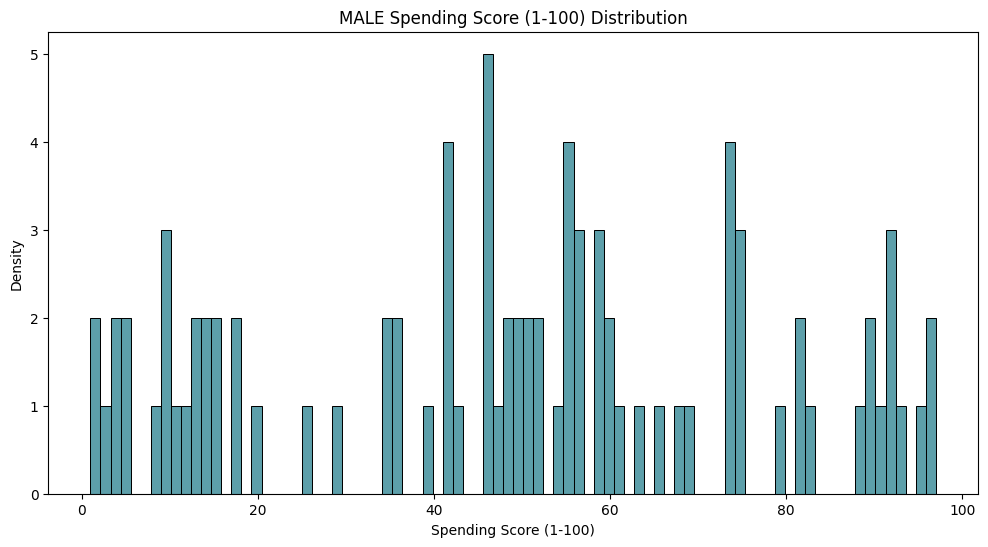

In [24]:
plt.figure(figsize = (12,6))
sns.histplot(data[data['Genre']=='Male']['Spending Score (1-100)'], bins = bins_spending_score, color = sns.color_palette('viridis')[2])
plt.title('MALE Spending Score (1-100) Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Density')
plt.show()

#### MEASURES OF SHAPE

1. SKEWNESS

2. KURTOSIS

In [25]:
data['Age'].skew()

np.float64(0.48556885096681657)

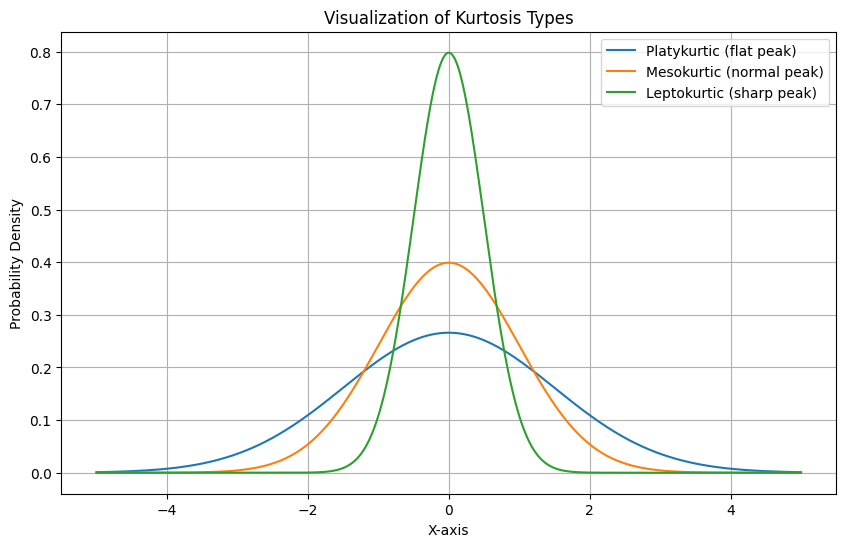

In [26]:
x = np.linspace(-5, 5, 1000)

# Normal distributions with different kurtosis-like shapes
platykurtic = norm.pdf(x, 0, 1.5)
mesokurtic = norm.pdf(x, 0, 1)
leptokurtic = norm.pdf(x, 0, 0.5)

plt.figure(figsize=(10,6))
plt.plot(x, platykurtic, label='Platykurtic (flat peak)')
plt.plot(x, mesokurtic, label='Mesokurtic (normal peak)')
plt.plot(x, leptokurtic, label='Leptokurtic (sharp peak)')
plt.title('Visualization of Kurtosis Types')
plt.xlabel('X-axis')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

| Kurtosis (Excess) | Distribution Type | Shape / Characteristics  | ML Interpretation                  | Recommended Preprocessing / Actions                                                                                                        |
| ----------------- | ----------------- | ------------------------ | ---------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------ |
| **< 0**           | Platykurtic       | Flatter peak, thin tails | Fewer outliers, data spread evenly | Usually no heavy outlier handling needed; standard scaling fine; may not need transformation                                               |
| **≈ 0**           | Mesokurtic        | Normal bell curve        | Typical distribution               | Standard scaling is fine; transformations optional based on algorithm                                                                      |
| **> 0**           | Leptokurtic       | Sharp peak, heavy tails  | More outliers/extreme values       | Consider capping/clipping; robust scaling; log/Box-Cox transformations; check for extreme influence in regression or distance-based models |


#### SKEW

Right-skewed → mean > median → long tail on the right → many small values, few very large values.

Left-skewed → mean < median → long tail on the left → many large values, few very small values.



| Skew Type                        | What It Means                     | Potential Issues                                                | Common Fixes / Transformations                                                                       |
| -------------------------------- | --------------------------------- | --------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------- |
| **Right-skewed** (mean > median) | Many small values, few large ones | Outliers/high-value dominance; model may overfit or misestimate | Apply **log(x+1)**, **sqrt(x)**, or **Box-Cox** transformation to compress large values              |
| **Left-skewed** (mean < median)  | Many large values, few small ones | Lower values underrepresented; affects normalization            | Apply **square(x)**, **exponential(x)**, or **reflect + log** (e.g., `log(max(x)+1 - x)`) to balance |
| **No skew (≈ 0)**                | Balanced shape                    | Well-behaved feature                                            | Usually no transformation needed                                                                     |


| Skewness Value (approx.) | Interpretation    | Action                               |
| ------------------------ | ----------------- | ------------------------------------ |
| -0.5 to +0.5             | Fairly symmetric  | Leave as is                          |
| -1 to -0.5 or +0.5 to +1 | Moderately skewed | Consider transformation              |
| < -1 or > +1             | Highly skewed     | Definitely transform before training |


| Transformation            | When to Use                         | What It Does                                      | Code Example                                          |
| ------------------------- | ----------------------------------- | ------------------------------------------------- | ----------------------------------------------------- |
| **Log Transform**         | For right-skewed data               | Compresses high values, makes data more symmetric | `np.log1p(x)`                                         |
| **Square Root Transform** | For mild right skew (like yours)    | Gently reduces skew                               | `np.sqrt(x)`                                          |
| **Box-Cox Transform**     | When you want optimal normalization | Finds best power λ to normalize                   | `scipy.stats.boxcox(x)` *(requires positive data)*    |
| **Yeo-Johnson Transform** | When data has zeros/negatives       | Works for all values                              | `PowerTransformer(method='yeo-johnson')` from sklearn |


Why Skewness Matters in ML

Many ML algorithms assume features are normally distributed (e.g., Linear Regression, Logistic Regression, SVM, k-NN).
When data is heavily skewed:

The model may overweight extreme values.

Distance-based algorithms (k-NN, clustering) may behave oddly since distances become distorted.

The model may fail to learn patterns well because of scale imbalances.

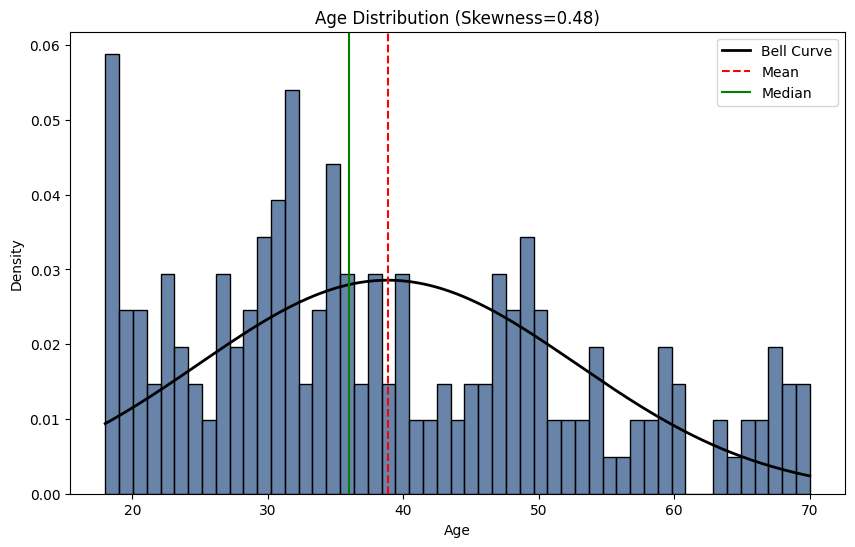

In [27]:
skew_val = skew(data['Age'])
kurt_val = kurtosis(data['Age']) 

plt.figure(figsize=(10,6))
sns.histplot(data['Age'], bins=51, stat= 'density', color= sns.color_palette('viridis')[1])
bell_curve_points = np.linspace(data['Age'].min(), data['Age'].max(), 1000)
plt.plot(bell_curve_points, norm.pdf(bell_curve_points, data['Age'].mean(), data['Age'].std()), color = 'black', linewidth =2, label = 'Bell Curve')
plt.axvline(data['Age'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(data['Age'].median(), color='green', linestyle='-', label='Median')

plt.title(f'Age Distribution (Skewness={skew_val:.2f})')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

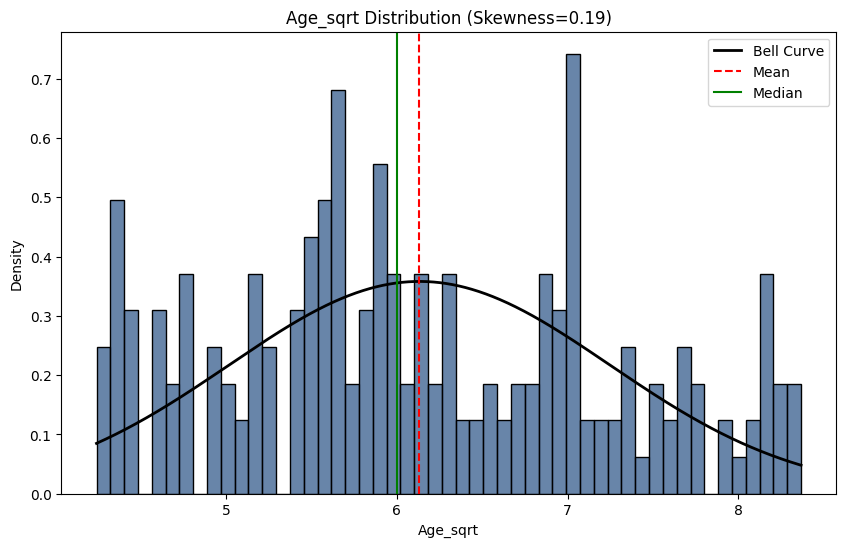

In [28]:
data['Age_sqrt'] = np.sqrt(data['Age'])
skew_val = skew(data['Age_sqrt'])
plt.figure(figsize=(10,6))
sns.histplot(data['Age_sqrt'], bins=51, stat= 'density', color= sns.color_palette('viridis')[1])
bell_curve_points = np.linspace(data['Age_sqrt'].min(), data['Age_sqrt'].max(), 1000)
plt.plot(bell_curve_points, norm.pdf(bell_curve_points, data['Age_sqrt'].mean(), data['Age_sqrt'].std()), color = 'black', linewidth =2, label = 'Bell Curve')
plt.axvline(data['Age_sqrt'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(data['Age_sqrt'].median(), color='green', linestyle='-', label='Median')

plt.title(f'Age_sqrt Distribution (Skewness={skew_val:.2f})')
plt.xlabel('Age_sqrt')
plt.ylabel('Density')
plt.legend()
plt.show()

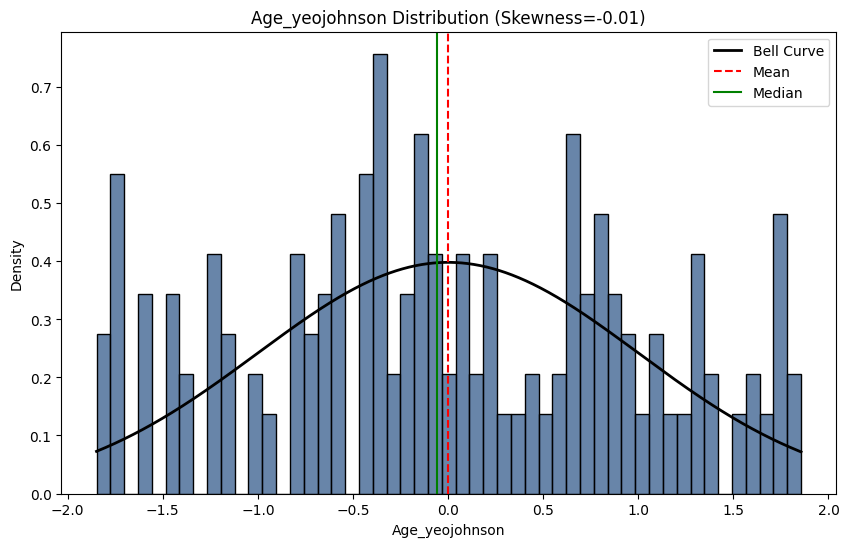

In [29]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
data['Age_yeojohnson'] = pt.fit_transform(data[['Age_sqrt']])
skew_val = skew(data['Age_yeojohnson'])

plt.figure(figsize=(10,6))
sns.histplot(data['Age_yeojohnson'], bins=51, stat= 'density', color= sns.color_palette('viridis')[1])
bell_curve_points = np.linspace(data['Age_yeojohnson'].min(), data['Age_yeojohnson'].max(), 1000)
plt.plot(bell_curve_points, norm.pdf(bell_curve_points, data['Age_yeojohnson'].mean(), data['Age_yeojohnson'].std()), color = 'black', linewidth =2, label = 'Bell Curve')
plt.axvline(data['Age_yeojohnson'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(data['Age_yeojohnson'].median(), color='green', linestyle='-', label='Median')

plt.title(f'Age_yeojohnson Distribution (Skewness={skew_val:.2f})')
plt.xlabel('Age_yeojohnson')
plt.ylabel('Density')
plt.legend()
plt.show()




In [30]:
kurt_val = kurtosis(data['Age_yeojohnson'])
kurt_val

np.float64(-0.9047421380471317)

| Scaler              | Output Range    | Handles Outliers | Notes                 |
| ------------------- | --------------- | ---------------- | --------------------- |
| MinMaxScaler        | [0,1]           | No               | Sensitive to outliers |
| StandardScaler      | Any             | No               | Mean=0, Std=1         |
| RobustScaler        | Any             | Yes              | Uses median & IQR     |
| MaxAbsScaler        | [-1,1]          | No               | Good for sparse data  |
| QuantileTransformer | [0,1] or normal | Yes              | Maps distribution     |
| PowerTransformer    | Any             | Some             | Reduces skew          |


Your kurtosis = -0.90 → mildly platykurtic.

ML impact:

Linear models / distance-based models: minor effect

Tree-based models: no effect

There are no extreme outliers to worry about → no action is needed.

#### STATISTICAL TESTS TO CHECK THE NORMALITY OF A DATESET

| Test                             | Description                                        |
| -------------------------------- | -------------------------------------------------- |
| **Shapiro-Wilk Test**            | Null hypothesis: data is normally distributed      |
| **Kolmogorov-Smirnov (KS) Test** | Compare distribution with reference (e.g., normal) |
| **Anderson-Darling Test**        | Variant of KS; more sensitive in tails             |
| **D’Agostino’s K² Test**         | Combines skewness and kurtosis into normality test |


| Test                             | Description                                                             | When to Use                                                                                           | How to Interpret / Inference                                                     | Type of Data | Notes / Tips                                                                                |
| -------------------------------- | ----------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------- | ------------ | ------------------------------------------------------------------------------------------- |
| **Shapiro-Wilk Test**            | Tests if data is normally distributed; null hypothesis: data ~ N(0,1)   | Small to medium datasets (<5000 samples) to check normality before parametric tests or ML assumptions | p > 0.05 → fail to reject normality (data ~ normal), p ≤ 0.05 → reject normality | Continuous   | Very powerful for small samples; sensitive to extreme outliers                              |
| **Kolmogorov-Smirnov (KS) Test** | Compares sample distribution to a reference distribution (e.g., normal) | Check goodness-of-fit or compare two sample distributions                                             | p > 0.05 → sample matches reference, p ≤ 0.05 → sample differs                   | Continuous   | Use Lilliefors variant for normality; less sensitive in tails                               |
| **Anderson-Darling Test**        | Variant of KS; more sensitive in tails of distribution                  | Detect deviations from normality, especially for extreme values                                       | Test statistic > critical value → reject null hypothesis (not normal)            | Continuous   | Provides critical values for different significance levels; better tail sensitivity than KS |
| **D’Agostino’s K² Test**         | Combines skewness and kurtosis into a single normality test             | Medium to large datasets; tests normality by considering both asymmetry and tail                      | p > 0.05 → fail to reject normality, p ≤ 0.05 → reject normality                 | Continuous   | Sensitive to both skewness and kurtosis; useful for detecting subtle deviations from normal |


In [31]:
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler

data['Age_win'] = winsorize(data['Age_yeojohnson'], limits=[0.01, 0.02])
scaler = MinMaxScaler()
data['Age_scaled'] = scaler.fit_transform(data[['Age_win']])

##### 1. Shapiro–Wilk

In [32]:
from scipy.stats import shapiro

stat, p = shapiro(data['Age_scaled'])
if p > 0.05:
    print("Data is likely normal", p)
else:
    print("Data is not normal", p)


Data is not normal 0.000279739120017623


##### 2. Kolmogorov–Smirnov (KS)

In [33]:
from scipy.stats import kstest, norm

stat, p = kstest(data['Age_scaled'], 'norm', args=(data['Age_scaled'].mean(), data['Age_scaled'].std()))
print("KS statistic:", stat)
print("p-value:", p)

if p > 0.05:
    print("Data is likely normal")
else:
    print("Data is not normal")


KS statistic: 0.06888272741131463
p-value: 0.28549902451736087
Data is likely normal


##### 3. Anderson–Darling

In [34]:
from scipy.stats import anderson

result = anderson(data['Age_scaled'])
print(result.statistic)
print(result.critical_values)
print(result.significance_level)


1.1097359610603519
[0.565 0.644 0.772 0.901 1.071]
[15.  10.   5.   2.5  1. ]


How to interpret

The null hypothesis (H₀) = “Data follows a normal distribution.”

We compare your statistic with the critical_values.

| Significance Level (%) | Critical Value | Comparison     | Decision    |
| ---------------------: | -------------: | -------------- | ----------- |
|                     15 |          0.565 | 1.1097 > 0.565 | ❌ Reject H₀ |
|                     10 |          0.644 | 1.1097 > 0.644 | ❌ Reject H₀ |
|                      5 |          0.772 | 1.1097 > 0.772 | ❌ Reject H₀ |
|                    2.5 |          0.901 | 1.1097 > 0.901 | ❌ Reject H₀ |
|                      1 |          1.071 | 1.1097 > 1.071 | ❌ Reject H₀ |


Inference

Since 1.1097 > all critical values, even the 1% level,
there is very strong evidence that your data is not normally distributed.

In simple words:

❌ Your data significantly deviates from a normal distribution.

##### 4. D’Agostino–Pearson normality test

scipy.stats.normaltest() combines skewness and kurtosis to test for normality.

It checks the null hypothesis:

H₀: The data comes from a normal distribution

H₁: The data does not come from a normal distribution


Interpretation

If p > 0.05 → ✅ Fail to reject H₀ → data is likely normal

If p ≤ 0.05 → ❌ Reject H₀ → data is not normal


In [35]:
from scipy.stats import normaltest

stat, p = normaltest(data['Age_scaled'])
print("Statistic:", stat)
print("p-value:", p)


Statistic: 23.070979910795447
p-value: 9.776881836312625e-06


The p-value (≈ 0.0000097) is way below 0.05.

So, there is strong evidence that your Age data does not follow a normal distribution.

The test statistic (23.07) is also quite high — the higher it is, the more deviation from normality (either from skew or kurtosis).


Why this happens

Even though your skew ≈ 0.2 and kurtosis ≈ -0.3 look moderate,
the D’Agostino–Pearson test is very sensitive when the sample size is large (~200+).

It flags even mild deviations, especially if tails (e.g., ages near 70) are slightly heavy.

##### SUMMARY


##### 1. What These Tests Tell Us — Why We Do Them

All these tests try to answer one basic question:

“Does my data look like a normal (bell-shaped) distribution?”

They compare your data against what a perfectly normal dataset would look like.

We do these tests because many statistical and machine learning methods (like linear regression, logistic regression, and ANOVA) make an assumption that:

“The data (or at least the residuals/errors) are normally distributed.”

If that assumption is not true, it can affect the accuracy, interpretability, or fairness of your model.

So — these tests don’t just check shape. They tell you whether it’s safe to use certain algorithms or preprocessing techniques that assume normality

👉 All tests require numeric data (no NaN values).

👉 Always check univariate normality (one column at a time).

##### 2. Interpretation — How to Read the Result

Every normality test starts with the same assumption:

Null Hypothesis (H₀): Data comes from a normal distribution

Alternative Hypothesis (H₁): Data does not come from a normal distribution

Then:

If p > 0.05 → ✅ Fail to reject H₀ → Data is likely normal

If p ≤ 0.05 → ❌ Reject H₀ → Data is not normal

For the Anderson–Darling test, it gives critical values instead of a p-value:

If your statistic < critical value → Data is normal

If statistic > critical value → Data is not normal

##### 3. How It Affects Your Machine Learning Model


| Model Type                                                     | Needs Normality?                        | Reason                                                                   |
| -------------------------------------------------------------- | --------------------------------------- | ------------------------------------------------------------------------ |
| **Linear Regression, Logistic Regression, LDA, PCA**           | ✅ Yes (for input features or residuals) | These models assume linear relationships and normally distributed errors |
| **Tree-based models (Decision Trees, Random Forest, XGBoost)** | ❌ No                                    | They split data by thresholds, not by distribution                       |
| **Neural Networks**                                            | ⚙️ Partially                            | Scaling helps optimization, not normality itself                         |
| **KNN, SVM**                                                   | ⚙️ Sometimes                            | Distance-based models work better with scaled and somewhat balanced data |


##### 4. So, failing a normality test doesn’t mean your model is broken — it just tells you that:

👉 You might need transformations (like log, Yeo-Johnson, Box-Cox, sqrt)

👉 Or you should choose models that don’t care about normality

##### 5. When the Test Turns Out in Your Favour (Data Is Normal)

If your data passes a normality test (p > 0.05):

✅ Benefits in ML:

👉 Linear models will perform more accurately and give more reliable coefficients.

👉 Model errors (residuals) will be more stable and homoscedastic (constant variance).

👉 You can safely apply parametric statistical tests (like t-test, ANOVA).

👉 Transformations (like standardization) will preserve relationships properly.


✅ Simpler preprocessing:
You won’t need to worry about power transformations, log-scaling, or outlier capping as much.

✅ Cleaner feature behavior:
If features are roughly normal, algorithms like PCA or LDA produce better separation between classes.

##### 6. Extra Important Points You Should Know

👉 A. Real-world data is rarely perfectly normal

Don’t stress if the test fails — that’s very common.
Focus on approximate normality (skew between -1 and +1, kurtosis between -1 and +1).

👉 B. Visual confirmation is key

Always pair these tests with a histogram or Q-Q plot.
Sometimes, a test rejects normality statistically, but visually it looks almost perfect.

👉 C. For large datasets, tests become too sensitive

With >1000 samples, even a tiny imperfection gives p < 0.05.
In that case, focus more on visualization and practical normality.

👉 D. Scaling ≠ Normalizing

1. Scaling (MinMaxScaler, StandardScaler) only changes the range or variance.

2. Normalizing (log, Yeo-Johnson, etc.) changes the shape of the distribution.

#### NON-PARAMETRIC TESTS

##### 1. What Are Parametric vs Non-Parametric Tests?

Think of parametric tests as “picky” tests — they assume a lot about your data:

👉 Data must be normally distributed

👉 Data should have equal variances

👉 Data should be continuous

👉 Often assumes independent observations

Examples:

👉 t-test (compare 2 means)

👉 ANOVA (compare 3+ means)

👉 Pearson correlation

Now, non-parametric tests are the “chill” ones — they don’t assume normality.
They just use ranks or medians instead of means.

So, when your normality test (like Shapiro-Wilk) says ❌ data not normal,
you switch to non-parametric tests.

##### 2. Why Use Non-Parametric Tests?

Because they:

👉 Work even if your data is skewed or has outliers

👉 Are distribution-free (don’t need the bell curve)

👉 Compare medians or ranks instead of means

They’re the robust fallback when your data breaks the assumptions of parametric tests.

| Purpose                   | Parametric Test         | Non-Parametric Alternative                  | Use When                            |
| ------------------------- | ----------------------- | ------------------------------------------- | ----------------------------------- |
| Compare 2 groups          | t-test                  | **Mann–Whitney U Test (Wilcoxon Rank-Sum)** | Two independent samples, not normal |
| Compare 2 paired samples  | Paired t-test           | **Wilcoxon Signed-Rank Test**               | Same subjects measured twice        |
| Compare 3+ groups         | ANOVA                   | **Kruskal–Wallis Test**                     | Independent groups, non-normal      |
| Compare 3+ related groups | Repeated Measures ANOVA | **Friedman Test**                           | Related samples, non-normal         |
| Measure correlation       | Pearson                 | **Spearman or Kendall correlation**         | Non-linear or ranked data           |


#### Mann–Whitney U Test

Imagine you have two groups (say Male vs Female).

Instead of comparing means, it ranks all values together and checks whether one group tends to have higher or lower ranks than the other.

So it tells you:

“Is one group generally higher or lower than the other — even if data isn’t normal?”

##### Kruskal–Wallis Test

The Kruskal–Wallis H test is a non-parametric test used to check whether three or more independent groups come from the same population.

Why Do We Use It?

Because sometimes:

Data isn’t normally distributed

Data has outliers

You have 3 or more groups

You don’t want to assume equal variances

So the Kruskal–Wallis test helps you stay statistically honest — it compares ranks, not raw numbers.

It compares 3 or more groups to see if at least one is statistically different.

It doesn’t tell you which one — for that, you do post-hoc pairwise tests (like Dunn’s test).

#### 1. Mann–Whitney U Test

In [36]:
from scipy.stats import mannwhitneyu

group_a = data[data['Genre'] == 'Female']['Age']
group_b = data[data['Genre'] == 'Male']['Age']

stat, p = mannwhitneyu(group_a, group_b)
print("Statistic:", stat)
print("p-value:", p)

if p < 0.05:
    print("Significant difference between groups")
else:
    print("No significant difference between groups")


Statistic: 4728.5
p-value: 0.6241559040716951
No significant difference between groups


##### SUMMARY

##### STEP 1: Why We Test for Normality

When you analyze data, you often want to compare groups, test relationships, or model outcomes.

But before doing that, you must ask:

“Does my data look like a normal (bell-shaped) distribution?”

Because some tests — like the t-test or ANOVA — assume that your data follows a normal distribution.
These are called parametric tests.


That’s why we run normality tests like:

Shapiro–Wilk

Anderson–Darling

D’Agostino–Pearson

Kolmogorov–Smirnov

If these tests say “data is normal”, ✅ you can safely use parametric tests (t-test, ANOVA).
If they say “data is not normal”, ❌ you must use non-parametric alternatives.

##### STEP 2: When Data Is Not Normal → We Switch to Non-Parametric Tests

That’s where your focus — Mann–Whitney, Kruskal–Wallis — comes in.

These tests don’t assume normality and instead work with ranks instead of actual numbers.
That makes them safer for data that’s skewed, heavy-tailed, or has outliers.

##### STEP 3: Quick Summary Table

| Goal                           | Parametric Test (Needs Normality) | Non-Parametric Alternative |
| ------------------------------ | --------------------------------- | -------------------------- |
| Compare 2 groups (independent) | t-test                            | **Mann–Whitney U**         |
| Compare 2 groups (paired)      | Paired t-test                     | **Wilcoxon signed-rank**   |
| Compare 3+ groups              | ANOVA                             | **Kruskal–Wallis**         |
| Correlation                    | Pearson                           | **Spearman**               |


| **Test / Measure**                  | **Description**                                                        | **When to Use**                                                  | **How to Interpret / Infer**                              | **Type of Data**                 | **Notes / Tips**                                    | **ML Relevance**                                                                | **Example Use / Insight**                                                    |                                                     |                                                             |
| ----------------------------------- | ---------------------------------------------------------------------- | ---------------------------------------------------------------- | --------------------------------------------------------- | -------------------------------- | --------------------------------------------------- | ------------------------------------------------------------------------------- | ---------------------------------------------------------------------------- | --------------------------------------------------- | ----------------------------------------------------------- |
| **Skewness**                        | Measures asymmetry of the distribution                                 | To check symmetry of a feature before ML or statistical modeling | >0 → right skew, <0 → left skew, ≈0 → symmetric           | Continuous                       | Useful for feature transformation decisions         | Helps decide if log/sqrt/power transformation is needed                         | If `Age` is right-skewed, apply log transform before regression model        |                                                     |                                                             |
| **Kurtosis**                        | Measures “tailedness” or peak sharpness                                | To check presence of extreme values/outliers in data             | >0 → leptokurtic, <0 → platykurtic, ≈0 → normal           | Continuous                       | Helps decide on outlier handling or feature scaling | Indicates outlier risk and tail behavior                                        | High kurtosis → use robust scaler or winsorization before ML                 |                                                     |                                                             |
| **Shapiro–Wilk Test**               | Tests if data is normally distributed                                  | Before parametric tests (t-test, ANOVA) or ML assumptions        | p > 0.05 → data likely normal, p ≤ 0.05 → not normal      | Continuous                       | Sensitive for small to medium datasets              | Confirms normality assumption before using models that assume Gaussian features | If p < 0.05, apply normalization or non-parametric model                     |                                                     |                                                             |
| **Kolmogorov–Smirnov Test**         | Compares sample distribution with reference (e.g., normal)             | Test normality or distribution fit                               | p > 0.05 → sample matches reference, p ≤ 0.05 → not match | Continuous                       | Can also compare two samples (two-sample K-S)       | Confirms if data fits specific distribution for probabilistic models            | Used to check if residuals in regression follow normal distribution          |                                                     |                                                             |
| **D’Agostino–Pearson (K²) Test**    | Combines skewness and kurtosis to test normality                       | When testing normality on medium/large datasets                  | p > 0.05 → likely normal, p ≤ 0.05 → not normal           | Continuous                       | Sensitive to both skew and kurtosis                 | Detects combined deviation from normality for ML preprocessing                  | Fails → prefer tree-based models over linear ones                            |                                                     |                                                             |
| **Anderson–Darling (AD) Test**      | Measures deviation from a specified distribution                       | To test normality at different confidence levels                 | Statistic > critical value → reject normality             | Continuous                       | Works well with small datasets                      | Quantifies how far data is from normal for scaling/transform decisions          | Large statistic → data very non-normal; transform before using linear models |                                                     |                                                             |
| **t-Test (Independent)**            | Compares means of two independent groups                               | Compare means between two groups                                 | p ≤ 0.05 → means differ significantly                     | Continuous, 2 groups             | Assumes normality; use Welch’s if variances unequal | Tests group difference significance before feature selection                    | Check if male vs female average income differ significantly                  |                                                     |                                                             |
| **Paired t-Test**                   | Compares means of two related groups                                   | Before-after or matched samples                                  | p ≤ 0.05 → means differ significantly                     | Continuous, paired               | Assumes differences are normal                      | Evaluates pre/post impact in model or experiment                                | Compare accuracy before and after model tuning                               |                                                     |                                                             |
| **ANOVA (F-test)**                  | Compares means across 3+ groups                                        | For >2 groups and continuous outcome                             | p ≤ 0.05 → at least one group mean differs                | Continuous, categorical groups   | Use post-hoc (Tukey) for which groups differ        | Used in feature selection or comparing category effects                         | Compare multiple regions’ sales to see if differences exist                  |                                                     |                                                             |
| **Mann–Whitney U Test**             | Compares distributions of two independent groups (non-parametric)      | When data not normal for 2 groups                                | p ≤ 0.05 → distributions differ significantly             | Continuous or ordinal, 2 groups  | Alternative to t-test                               | Use when Shapiro/KS fail; robust to outliers                                    | Compare satisfaction between two customer groups without assuming normality  |                                                     |                                                             |
| **Kruskal–Wallis H Test**           | Compares distributions across 3+ independent groups (non-parametric)   | When normality fails for multiple groups                         | p ≤ 0.05 → at least one group differs                     | Continuous or ordinal, 3+ groups | Alternative to ANOVA                                | Ideal for ordinal/non-normal grouped data                                       | Compare median satisfaction scores across 3+ service centers                 |                                                     |                                                             |
| **Chi-Square Test**                 | Tests association between categorical variables                        | Check independence between categorical features                  | p ≤ 0.05 → reject independence; association exists        | Categorical                      | Needs expected frequency ≥5                         | Identifies feature dependency for categorical predictors                        | Find if “Gender” and “Purchase” are dependent                                |                                                     |                                                             |
| **Correlation (Pearson)**           | Measures linear relationship between variables                         | Check linear dependency between continuous variables             | r ∈ [-1,1]; >0.7 strong, 0.3–0.7 moderate, <0.3 weak      | Continuous                       | Sensitive to outliers; assumes linearity            | Detects redundant features; useful for dimensionality reduction                 | Drop one of two features with r > 0.9                                        |                                                     |                                                             |
| **Spearman Rank Correlation**       | Measures monotonic relationship between ranked or non-normal variables | When data not normal or ordinal                                  | rho ∈ [-1,1]; same as Pearson                             | Continuous or ordinal            | Non-parametric alternative to Pearson               | Captures non-linear but monotonic relationships                                 | Use when relationship is not linear but ordered                              |                                                     |                                                             |
| **Variance Inflation Factor (VIF)** | Measures multicollinearity between features                            | Before regression to detect correlated predictors                | VIF > 5 or 10 → high multicollinearity                    | Continuous features              | Helps feature selection / dimensionality reduction  | Ensures independent predictors in regression models                             | Remove one of two correlated features with high VIF                          |                                                     |                                                             |
| **Levene’s Test**                   | Tests equality of variances                                            | Check assumption of equal variance before t-test/ANOVA           | p ≤ 0.05 → variances differ significantly                 | Continuous                       | More robust than Bartlett for non-normal data       | Confirms homoscedasticity assumption before using parametric tests              | Ensures fair variance comparison across groups                               |                                                     |                                                             |
| **Z-score / Standard Score**        | Measures how many standard deviations a value is from mean             | To detect outliers or standardize features                       |                                                           | z                                | > 3 → potential outlier                             | Continuous                                                                      | Used for scaling or outlier detection                                        | Standardizes data for ML; identifies extreme values | Use before clustering or distance-based algorithms like KNN |
